[과제]

신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이 Target 값으로 연체일 경우 1, 정상납부가 0임. PCA 데이터 세트에 기반한 신용카드 고객 연체 여부 분류 예측을 아래와 같이 수행하세요.

독립변수간 상관도를 시각화
독립변수간 상관도가 0.9인 속성 6개를 2개의 PCA 컴포넌트 변환 뒤 교차 검증(CV=3) 하여 변환 후 이전의 정확도와 비교

In [69]:
import pandas as pd

# df = pd.read_excel('dataset/credit_card.xls', sheet_name='Data',header=1)
df = pd.read_excel('dataset/credit_card.xls',header=1)
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [71]:
df.rename({'PAY_0':'PAY_1', 'default payment next month':'target' },axis=1,inplace=True)
df2 = df.drop('ID',axis=1)

In [72]:
df2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [73]:
y = df.target
X = df2.drop('target',axis=1)

<AxesSubplot:>

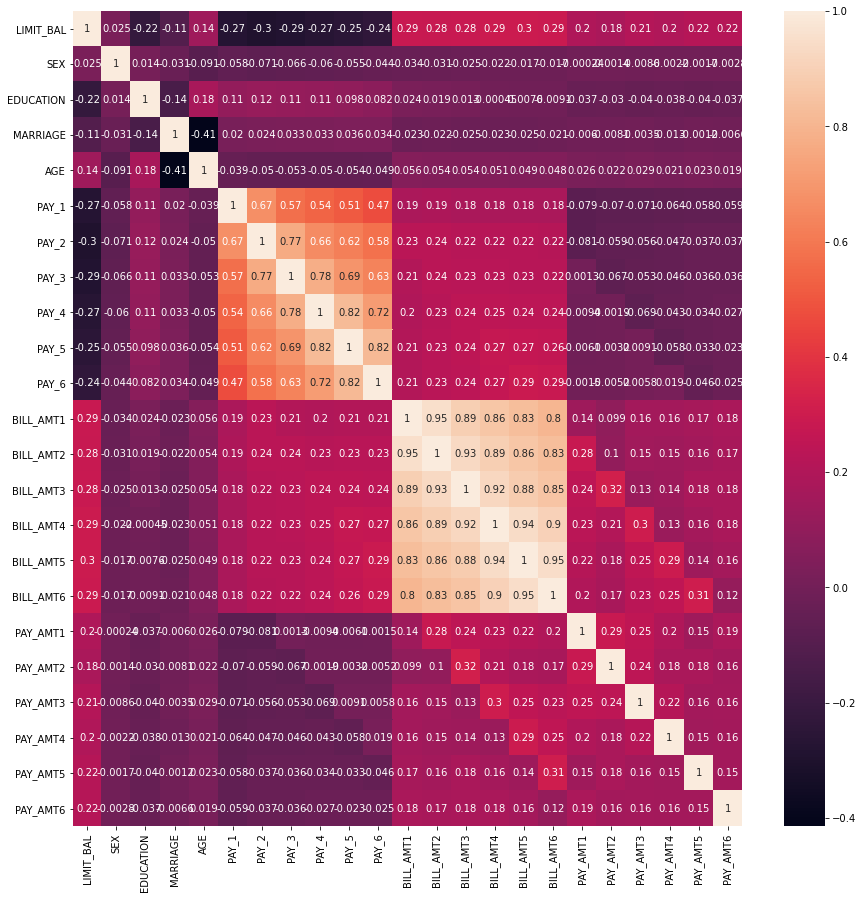

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True)

In [19]:
X.corr().columns
bill_col = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [40]:
from sklearn.preprocessing import StandardScaler
bill_X = X[bill_col]
bill_X.head()
scaler = StandardScaler()
bill_X_std = scaler.fit_transform(bill_X)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bill_scaler_features = scaler.fit_transform(bill_X)

pca = PCA(n_components=2)
bill_pca_ary = pca.fit_transform(bill_scaler_features)

print('PCA Components 변동성 : ', pca.explained_variance_ratio_)

PCA Components 변동성 :  [0.90555253 0.0509867 ]


In [45]:
pca_2_X = pd.DataFrame(bill_pca_ary, columns = (['BILL1','BILL2']))
pca_2_X

,BILL1,BILL2
0,-1.611148,0.012479
1,-1.547595,-0.062344
2,-1.035874,0.011256
3,-0.250712,0.174374
4,-0.968951,-0.213032
...,...,...
29995,2.610194,2.419078
29996,-1.521009,-0.066271
29997,-1.195519,-0.359507
29998,-0.008293,-0.049958


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
#
def get_val_score(model, X, y):
    score = cross_val_score(model, X, y , scoring='accuracy' ,cv=3)
    print('CV=3 일때의 Fold 세트별 정확도 : ', score)
    print('평균 정확도(accuracy) : ' , np.mean(score))

print('pca 컴퍼넌트2 차원축소피쳐(bill) 정확도')
get_val_score(rcf, pca_2_X, y)
print()
print('pca 하지않은 원본피쳐(bill) 정확도')
get_val_score(rcf, bill_X_std, y)

pca 컴퍼넌트2 차원축소피쳐(bill) 정확도
CV=3 일때의 Fold 세트별 정확도 :  [0.7469 0.7506 0.7515]
평균 정확도(accuracy) :  0.7496666666666667

pca 하지않은 원본피쳐(bill) 정확도
CV=3 일때의 Fold 세트별 정확도 :  [0.77   0.7731 0.775 ]
평균 정확도(accuracy) :  0.7726999999999999


In [ ]:
####################################################################################################################################
####################################################################################################################################
####################################################################################################################################
####################################################################################################################################
####################################################################################################################################
####################################################################################################################################
####################################################################################################################################
####################################################################################################################################

In [68]:
# 전체 데이터 피쳐를 통째로 변환 n_components = 6 으로. 그리고 원본피쳐 & PCA 피쳐
pca = PCA(n_components=6)
pca_X = pca.fit_transform(X)

pca_X = pd.DataFrame(pca_X)


X_pca_std = scaler.fit_transform(pca_X) # pca 데이터 피쳐 정규화
X_all_std = scaler.fit_transform(X) # 전체 데이터 피쳐 정규화 

print(f'PCA 데이터 사이즈 : {X_pca_std.shape}\n전체 데이터 사이즈{X_all_std.shape}')

PCA 데이터 사이즈 : (30000, 6)
전체 데이터 사이즈(30000, 23)


In [63]:
X_list = [X_pca_std, X_all_std]

for i in X_list:
    get_val_score(rcf, i , y)

CV=3 일때의 Fold 세트별 정확도 :  [0.7756 0.7815 0.7818]
평균 정확도(accuracy) :  0.7796333333333333
CV=3 일때의 Fold 세트별 정확도 :  [0.8083 0.8194 0.8229]
평균 정확도(accuracy) :  0.8168666666666665


[과제]

아래 dataset으로 연관성 분석을 수행하세요.

In [75]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Ice cream', 'Eggs']]

In [77]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary,columns=te.columns_)
df

,Apple,Corn,Eggs,Ice cream,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,True,False,True,True,True,False,True
1,False,False,True,False,False,True,True,False,True
2,True,False,True,False,True,False,False,False,False
3,False,True,False,False,True,False,False,True,True
4,False,True,True,True,False,False,True,False,False


In [86]:
# 지지도 0.5
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,0.6,(Milk)
2,0.6,(Onion)
3,0.6,(Yogurt)
4,0.6,"(Eggs, Onion)"


In [87]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
